In [22]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import style 
style.use('seaborn')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier


In [23]:
df = pd.read_csv('fake_news_dataset.csv')

In [24]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [25]:
df.isnull().any()

Unnamed: 0    False
title         False
text          False
label         False
dtype: bool

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df.text, df.label, random_state=5,test_size=0.2)

In [27]:
tf_vector = TfidfVectorizer(stop_words='english',max_df=0.7)

tf_train = tf_vector.fit_transform(X_train)
tf_test = tf_vector.transform(X_test)

## Visualization

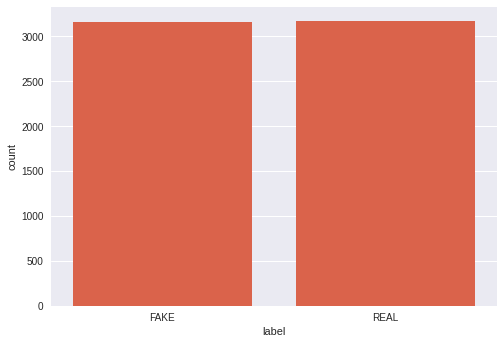

In [28]:
import seaborn as sns
sns.countplot(x='label',data = df,color='#f25333')

---

# PAC

In [29]:
pca = PassiveAggressiveClassifier(max_iter=700)

In [30]:
pac.fit(tf_train,y_train)

PassiveAggressiveClassifier(max_iter=700)

In [31]:
y_pred = pca.predict(tf_test)
print('Accuracy is : ',accuracy_score(y_test,y_pred)*100,'%')

Accuracy is :  93.6069455406472 %


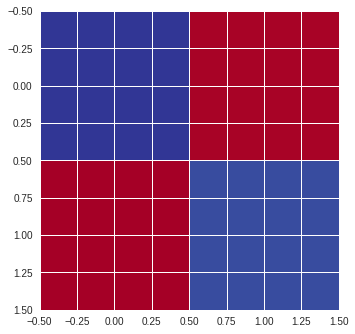

In [32]:
plt.imshow(np.log(confusion_matrix(y_test,y_pred)),cmap = 'RdYlBu',interpolation='nearest')
plt.show()

# RandomForestClassifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
model = RandomForestClassifier(n_estimators=10)

# fit the data
model.fit(tf_train,y_train)

RandomForestClassifier(n_estimators=10)

In [35]:
y_pred = model.predict(tf_test)
print('Accuracy is : ',accuracy_score(y_test,y_pred)*100,'%')

Accuracy is :  86.26677190213103 %


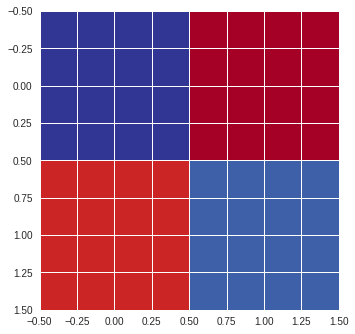

In [36]:
# visualize the confusion matrix 
plt.imshow(np.log(confusion_matrix(y_test,y_pred)),cmap = 'RdYlBu',interpolation='nearest')
plt.show()

# SVM

In [37]:
from sklearn.svm import SVC

In [38]:
model = SVC()
model.fit(tf_train,y_train)

SVC()

In [39]:
y_pred = model.predict(tf_test)
print('Accuracy is : ',accuracy_score(y_test,y_pred)*100,'%')

Accuracy is :  92.65982636148382 %


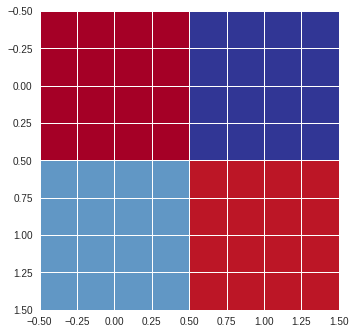

In [44]:
# visualize the confusion matrix 
plt.imshow(np.log(confusion_matrix(y_test,y_pred)),cmap = 'RdYlBu_r',interpolation='nearest')
plt.show()

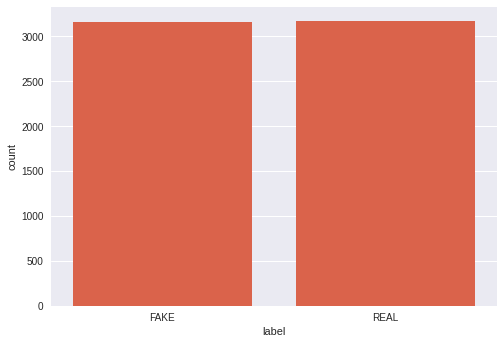

In [41]:
import seaborn as sns
sns.countplot(x='label',data = df,color='#f25333')